# Week-1 Assignment

# **Gotta catch 'em all !**

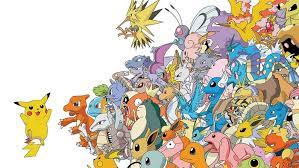

**Welcome to your first graded assignment! Hope that you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about Pokemons.**

**We have got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


### 2) Read the csv file and assign it to a variable .

In [ ]:
df=pd.read_csv("W1_Pokemon.csv")


### 3) Display shape of dataframe
Expected Output - (800, 13)

In [ ]:
#your code here
print(df.shape)

(800, 13)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [ ]:
column_names = df.columns.tolist()

print(column_names)

['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']


### 5) Remove the column '#' and update the dataframe.

In [ ]:
#your code here

df = df.drop('#', axis=1)


### 6) Set the 'Name' column as the index of dataframe

In [ ]:
df = df.set_index('Name')



###  7) Print a list of all the unique Type-1 powers

In [ ]:
#your code here
unique_type1_powers = df['Type 1'].unique().tolist()
print(unique_type1_powers)


['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon', 'Dark', 'Steel', 'Flying']


### 8) Create a column which contains the Type 1 and Type 2 abilities of pokemons, seperated with a '+'' sign. Also, display the no. of pokemons that have type-1 power as 'Psychic' and type 2 power as 'Flying' using this new column.

In [ ]:
df['Type1&Type2']=df['Type 1']+'+'+ df['Type 2']


In [ ]:
count = df[df['Type1&Type2'] == 'Psychic+Flying']
print(len(count))


6


## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. How many pokemons have 'Mega' in their name?

In [ ]:
count = df[df.index.str.contains('Mega')]
print(len(count))


49


### 2. What is the standard deviation of Sp. Def. in the dataset ?

In [ ]:
std_val=df['Sp. Def'].std()
print(std_val)

27.82891579711745


### 3. What percentage (upto 3 decimal places) of pokemons are legendary ?

In [ ]:
legendary_count = df[df['Legendary'] == True].shape[0]
total_count = df.shape[0]
percentage = (legendary_count / total_count) * 100
print(f"{percentage:.3f}%")


8.125%


### 4. Name the pokemon(s) with Maximum Defense.

In [ ]:
max = df['Defense'].max()
strongest_defenders = df[df['Defense'] == max]
print(strongest_defenders.index.tolist())



['SteelixMega Steelix', 'Shuckle', 'AggronMega Aggron']


### 5. Which poison pokemon has the strongest attack ?

In [ ]:
high=df['Attack'].max()

strongest_attack=df[df['Attack']==high]
print(strongest_attack.index.tolist())

['MewtwoMega Mewtwo X']


### 6. Using seaborn make different types of plots, observe the trend and answer the questions given in the form.

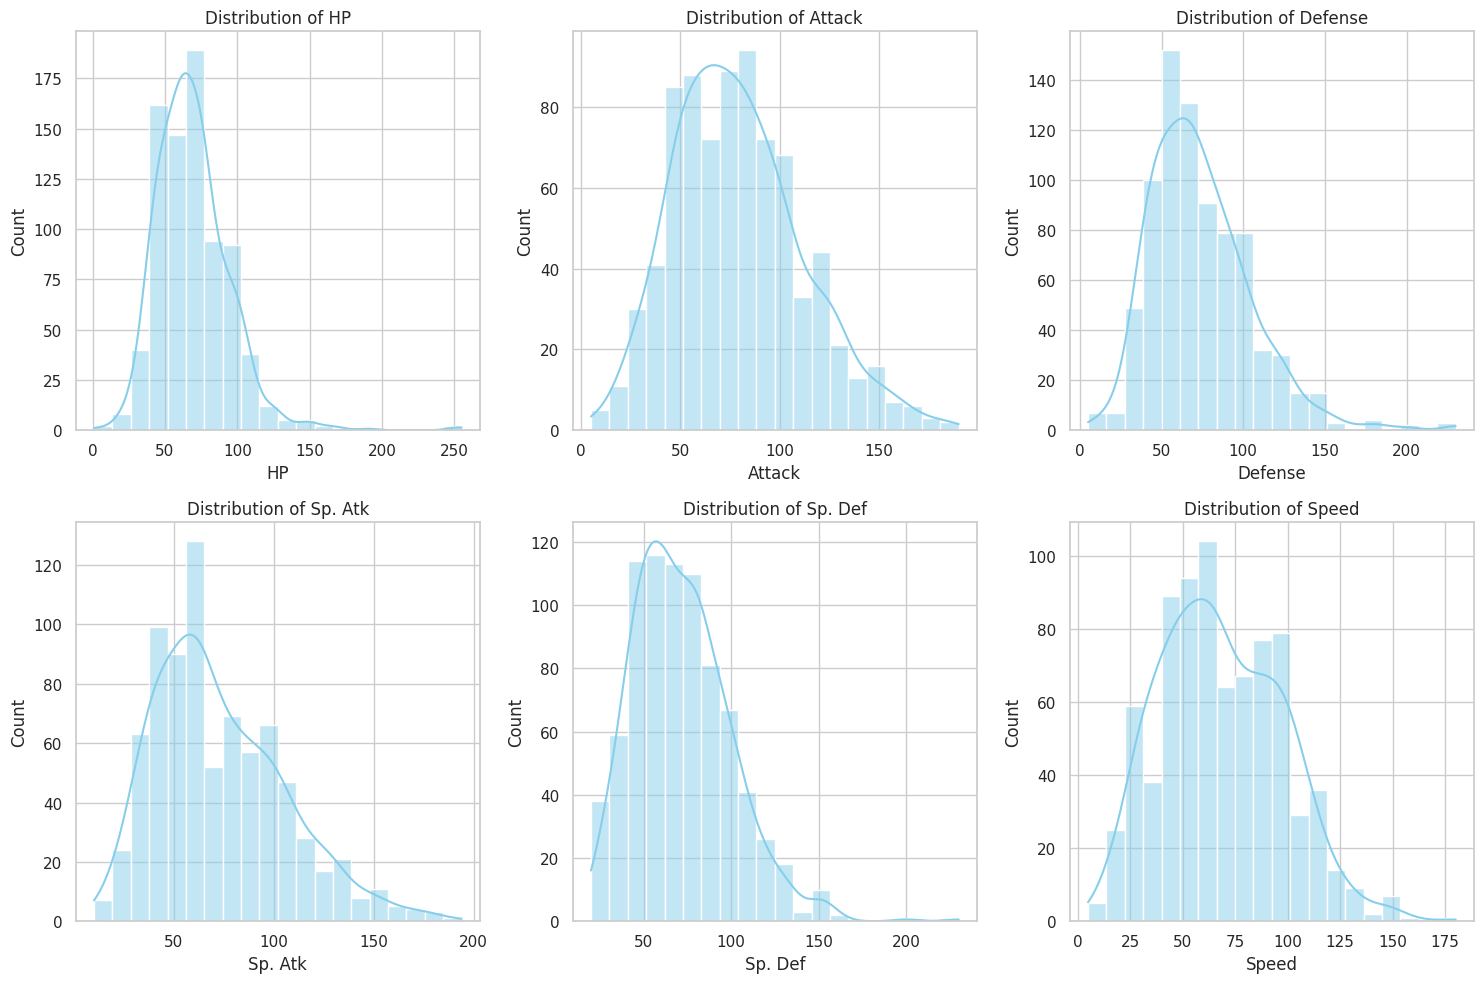

In [ ]:


sns.set(style="whitegrid")


plt.figure(figsize=(15, 10))
stat_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for i, col in enumerate(stat_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()



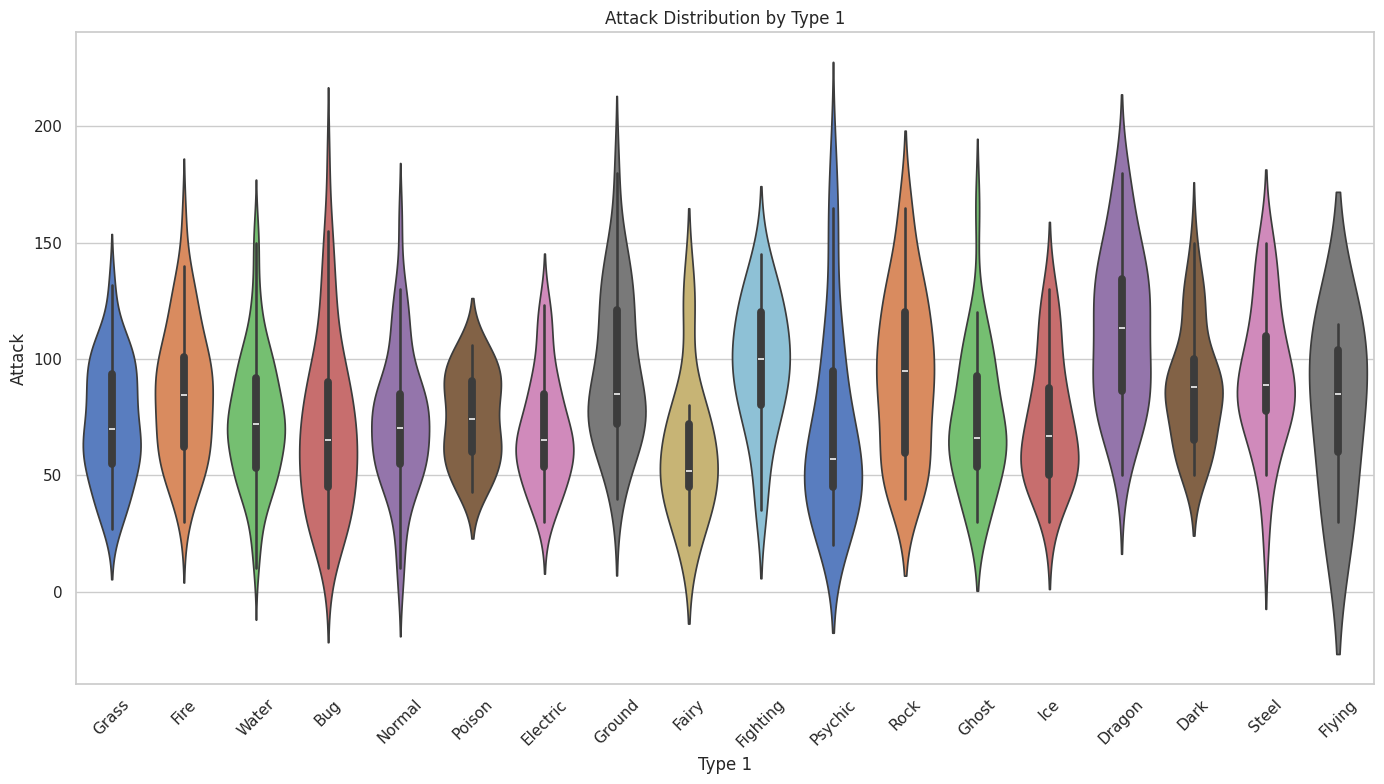

In [ ]:
#your code here
# Violin plot of Type 1 vs Attack
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='Type 1',
    y='Attack',
    hue='Type 1',
    data=df,
    palette='muted',
    legend=False
)
plt.xticks(rotation=45)
plt.title('Attack Distribution by Type 1')
plt.tight_layout()
plt.show()


### 7. Which is the second fastest non-legendary 'Ghost' type pokemon from 4th generation ?

In [ ]:
ghost_gen4 = df[
    (df['Type 1'] == 'Ghost') |
    (df['Type 2'] == 'Ghost')
]
ghost_gen4 = ghost_gen4[
    (ghost_gen4['Legendary'] == False) &
    (ghost_gen4['Generation'] == 4)
]

# Sort
ghost_gen4_sorted = ghost_gen4.sort_values(by='Speed', ascending=False)
second_fastest_pokemon = ghost_gen4_sorted.iloc[1].name
second_fastest_speed = ghost_gen4_sorted.iloc[1]['Speed']

print(f"The second fastest non-legendary 'Ghost' type pokemon from 4th generation is {second_fastest_pokemon} with a speed of {second_fastest_speed}.")

The second fastest non-legendary 'Ghost' type pokemon from 4th generation is Mismagius with a speed of 105.


### 8. How many non-legendary pokemons have stronger defence but weaker attack than Charizard?

In [ ]:
#your code here
charizard_defence = df.loc['Charizard', 'Defense']
charizard_attack = df.loc['Charizard', 'Attack']

count=df[(df['Legendary']==False)& (df['Attack']<charizard_attack)&(df['Defense']>charizard_defence)]
print(len(count))

116



## ***Bonus Questions***
## Here are some bonus questions that you can try further !

### These questions are UNGRADED, and are given as an extra exercise.

### Which pokemon has the highest combined value of Attack and Sp. Atk ?

In [ ]:
df['totalattack']=df['Sp. Atk']+df['Attack']
highest_totolattack=df['totalattack'].max()
ans=df[df['totalattack']==highest_totolattack]
print(ans.index.tolist())

['RayquazaMega Rayquaza', 'DeoxysAttack Forme']


### Which type of legendary pokemons are the most common?

In [ ]:
legendary_types = df[df['Legendary'] == True]['Type 1'].value_counts()
most_common_type = legendary_types.idxmax()
most_common_count = legendary_types.max()

print(most_common_type, most_common_count)


Psychic 14


### How many generation-3, non-legendary pokemons have higher HP than the weakest generation-6, legendary pokemon?

In [ ]:

gen6_legendary = df[(df['Generation'] == 6) & (df['Legendary'] == True)]
weakest_gen6_legendary_hp = gen6_legendary['HP'].min()


gen3_non_legendary = df[(df['Generation'] == 3) & (df['Legendary'] == False)]
stronger_hp_count = (gen3_non_legendary['HP'] > weakest_gen6_legendary_hp).sum()

print("Count:", stronger_hp_count)


Count: 95


### Print out the third slowest pokemon(s) in the dataset.

In [ ]:
df_reset = df.reset_index()
sorted_by_speed = df_reset.sort_values(by='Speed')
third_lowest_speed = sorted_by_speed['Speed'].unique()[2]

# Get all Pokemon with that speed
third_slowest_pokemon = sorted_by_speed[sorted_by_speed['Speed'] == third_lowest_speed]

print(third_slowest_pokemon[['Name', 'Speed']])

           Name  Speed
188   Igglybuff     15
583  Roggenrola     15
85     Slowpoke     15
187      Cleffa     15
289     Silcoon     15
219      Pineco     15
209      Wooper     15
291     Cascoon     15
651     Foongus     15


### Which pokemon type has the highest average HP?

In [ ]:

df_reset = df.reset_index()

avg_hp_by_type = df_reset.groupby('Type 1')['HP'].mean()


highest_avg_hp_type = avg_hp_by_type.idxmax()
highest_avg_hp_value = avg_hp_by_type.max()

print(f"Type with highest average HP: {highest_avg_hp_type} ({highest_avg_hp_value:.2f})")

Type with highest average HP: Dragon (83.31)
